<a href="https://colab.research.google.com/github/ngcheeyuan/Classification_projects/blob/main/cifar10_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tensorflow_datasets
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split

In [7]:
(train_images , train_labels) , (test_images,test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [8]:
train_images , val_images , train_labels , val_labels = train_test_split(train_images,
                                                                         train_labels,
                                                                         test_size = 0.25,
                                                                         shuffle = True)

In [9]:
BATCH_SIZE = 32 
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

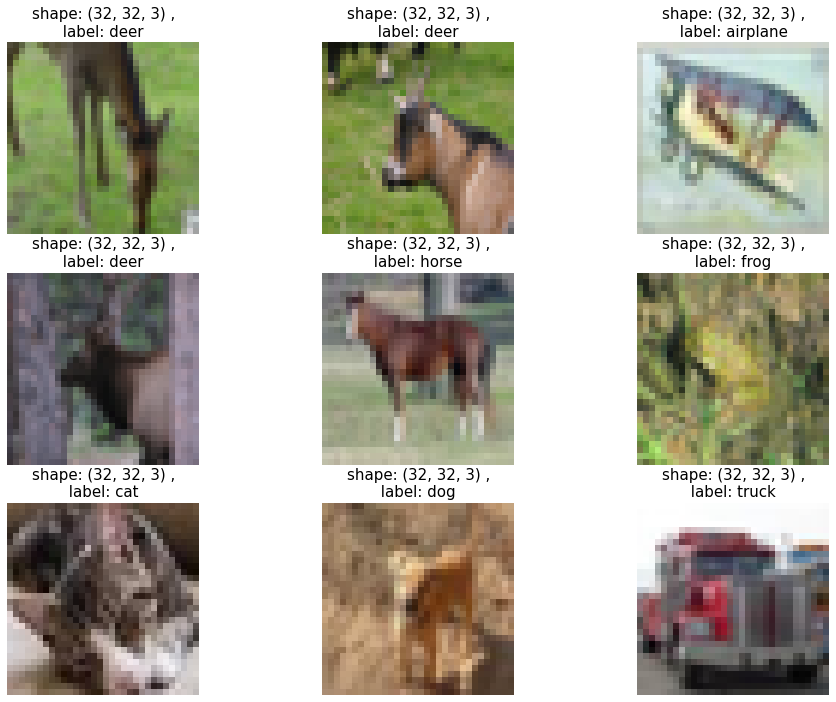

In [10]:
import random
random_index = random.randint(0,(len(train_images)-9))
plt.figure(figsize = (16,12))
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(train_images[random_index+i])
  plt.title(f"shape: {train_images[random_index+i].shape} ,\n label: {classnames[train_labels[random_index+i][0]]} " , fontsize = 15)
  plt.axis(False)

## Prepare dataset for faster processing

In [11]:
def preprocessing_func(images,labels,scale = True,augmentation = False):
  data_augmentation = tf.keras.Sequential([
                                           tf.keras.layers.RandomContrast(0.1),
                                           tf.keras.layers.RandomFlip('horizontal'),
                                           tf.keras.layers.RandomTranslation(0.1,0.1),
                                           tf.keras.layers.RandomZoom(0.1)
  ])
  
  if scale:
    images = tf.cast(images/255,dtype = tf.float32)
  else:
    images = tf.cast(images,dtype = tf.float32)
  #labels = tf.cast(labels,dtype = tf.float32)

  image_data = tf.data.Dataset.from_tensor_slices(images)
  feature_data = tf.data.Dataset.from_tensor_slices(labels)
  dataset = tf.data.Dataset.zip((image_data,feature_data))

  if augmentation:
    dataset = dataset.map(lambda x,y : (data_augmentation(x),y))

  dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

  return dataset

In [12]:
train_dataset = preprocessing_func(train_images,train_labels)
val_dataset = preprocessing_func(val_images,val_labels)
test_dataset = preprocessing_func(test_images,test_labels)

In [13]:
train_images.shape ,train_labels.shape

((37500, 32, 32, 3), (37500, 1))

In [14]:
train_dataset , val_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>)

In [ ]:
len(train_dataset)

1172

## Model 0:

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
input = layers.Input(shape = (32,32,3), name = 'input_layer')
x =  layers.Conv2D(32, (3, 3), activation='relu')(input)
x = (layers.MaxPooling2D((2, 2)))(x)
x = (layers.Conv2D(64, (3, 3), activation='relu'))(x)
x = (layers.MaxPooling2D((2, 2)))(x)
x = (layers.Conv2D(64, (3, 3), activation='relu'))(x)
x = (layers.Flatten())(x)
x = (layers.Dense(64, activation='relu'))(x)
output =(layers.Dense(10 , activation = 'softmax'))(x)

model_0 = tf.keras.Model(inputs = input,
                         outputs = output , name = 'Model_0')

model_0.compile(optimizer= tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model_0.summary()

Model: "Model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3692

In [ ]:
filepath = 'model_checkpoints'
history_0 = model_0.fit(train_dataset,
                        epochs=10, 
                        validation_data=(val_dataset),
                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2,
                                                                      restore_best_weights = True,
                                                                      min_delta = 0.01),
                                     tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints',
                                                                        save_best_only = True)])


Epoch 1/10
1172/1172 [==============================] - 50s 43ms/step - loss: 1.9312 - accuracy: 0.2771 - val_loss: 1.6231 - val_accuracy: 0.4022
Epoch 2/10
1172/1172 [==============================] - 51s 44ms/step - loss: 1.5220 - accuracy: 0.4422 - val_loss: 1.4238 - val_accuracy: 0.4806
Epoch 3/10
1172/1172 [==============================] - 53s 45ms/step - loss: 1.3356 - accuracy: 0.5214 - val_loss: 1.2754 - val_accuracy: 0.5382
Epoch 4/10
1172/1172 [==============================] - 97s 83ms/step - loss: 1.2048 - accuracy: 0.5728 - val_loss: 1.2048 - val_accuracy: 0.5698
Epoch 5/10
1172/1172 [==============================] - 49s 42ms/step - loss: 1.1019 - accuracy: 0.6107 - val_loss: 1.1599 - val_accuracy: 0.5928
Epoch 6/10
1172/1172 [==============================] - 49s 42ms/step - loss: 1.0196 - accuracy: 0.6405 - val_loss: 1.1155 - val_accuracy: 0.6138
Epoch 7/10
1172/1172 [==============================] - 49s 42ms/step - loss: 0.9535 - accuracy: 0.6645 - val_loss: 1.0798 -

In [ ]:
model_0 = tf.keras.models.load_model('/content/model_checkpoints')

In [ ]:
model_0.evaluate(val_dataset)

391/391 [==============================] - 5s 11ms/step - loss: 0.9992 - accuracy: 0.6571


[0.9991700649261475, 0.6571199893951416]

In [ ]:
preds_probs = model_0.predict(val_dataset)
preds = np.argmax(preds_probs, axis = 1)

In [15]:
def plot_results(model,preds,val_labels):
  df = pd.DataFrame(classification_report(preds , val_labels,output_dict = True)).rename(columns = {f'{i}':classnames[i] for i in range(0,10)}).T
  df = df.sort_values(by = 'f1-score' , ascending = False)
  plt.figure(figsize=(10,7))
  plt.barh(df.index , df['f1-score'])
  plt.xlabel('f1-score');
  plt.title(f'F1-score for each classes for : {model.name}')

In [29]:
def plot_loss_curves(history):
  df = pd.DataFrame(history.history)
  df['epoch'] = df.index
  plt.figure(figsize = (12,6))
  plt.subplot(1,2,1)
  plt.plot(df.epoch , df.val_accuracy , label = 'val_accuracy')
  plt.plot(df.epoch , df.accuracy , label = 'accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(df.epoch , df.val_loss , label = 'val_loss')
  plt.plot(df.epoch , df.loss , label = 'loss')
  plt.legend()


In [17]:
import pandas as pd

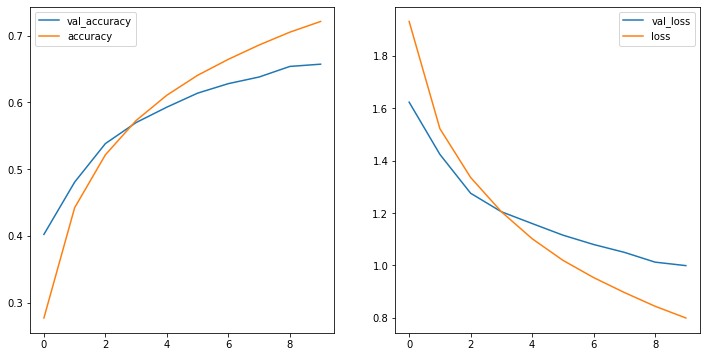

In [ ]:
plot_loss_curves(history_0)

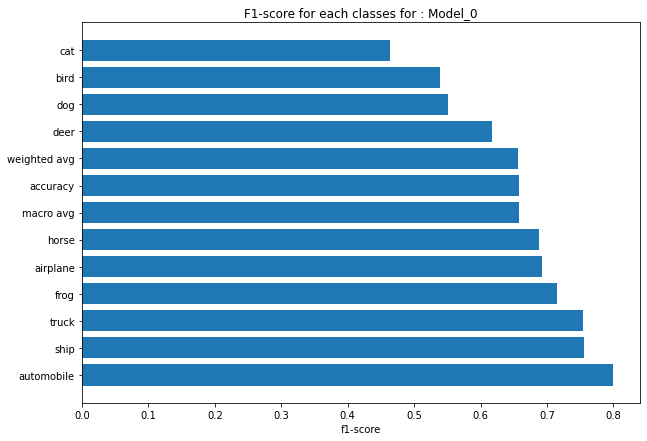

In [ ]:
plot_results(model_0,preds , tf.squeeze(val_labels).numpy())

In [ ]:
predicted_probabilities = np.max(preds_probs , axis = 1)
prediction_df = pd.DataFrame({'images': list(val_images),
                'predicted_probabilities':predicted_probabilities,
                'true_labels': tf.squeeze(val_labels).numpy(),
                'predicted_labels': preds,
                'true_class':[classnames[i] for i in tf.squeeze(val_labels).numpy()],
                'pred_class':[classnames[i] for i in preds]})

In [ ]:
top_100_wrong_predictions = prediction_df[prediction_df.true_labels!=prediction_df.predicted_labels].sort_values(by = 'predicted_probabilities').tail(100).reset_index(drop = True)

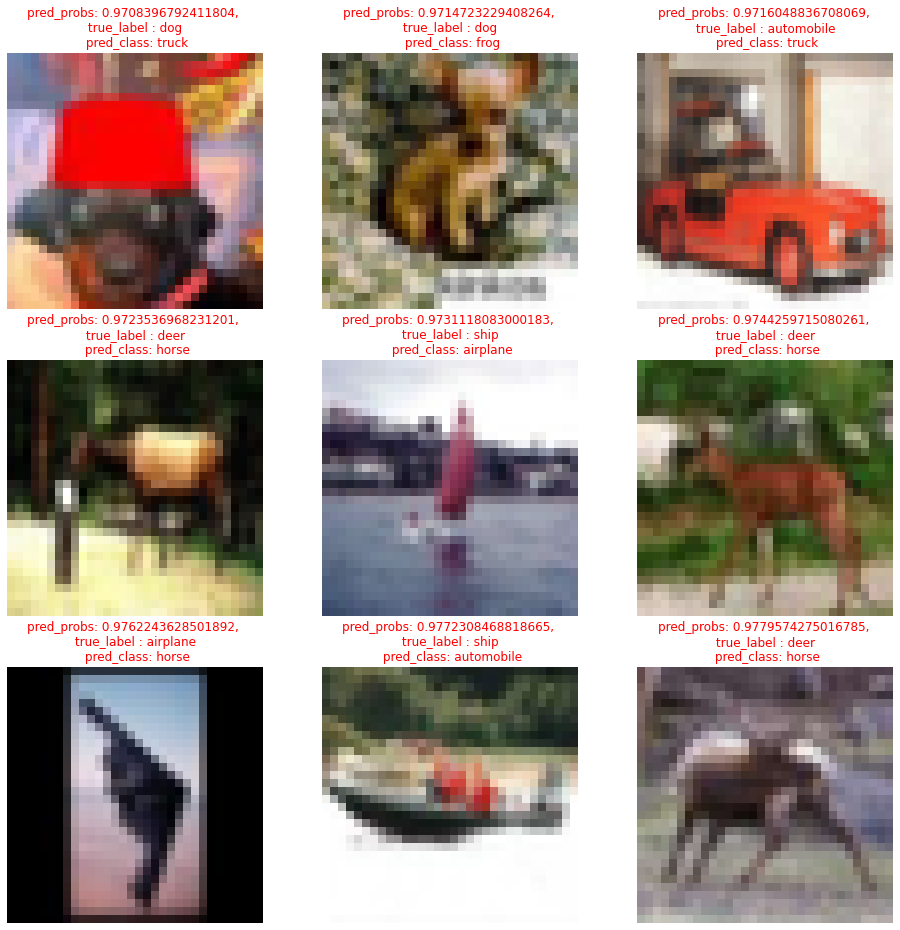

In [ ]:
random_index = random.randint(0,100-9)
plt.figure(figsize = (16,16))
for index,row in enumerate(top_100_wrong_predictions[random_index:random_index+9].itertuples(),1):
  _,images,probs,_,_,true_class,pred_class = row
  plt.subplot(3,3,index)
  imshow(images)
  plt.title(f'pred_probs: {probs}, \n true_label : {true_class} \n pred_class: {pred_class}', color = 'r')
  plt.axis(False)

## Model 1: EfficientNetB0 - non-trainable

In [ ]:
input_shape = (32,32,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs = layers.Input(shape =input_shape , name = 'input_layer')
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(classnames))(x)
outputs = layers.Activation('softmax', dtype = tf.float32 , name = 'softmax_float32')(x)
model_1 = tf.keras.Model(inputs,outputs , name = 'EfficientNetB0')

# compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
 softmax_float32 (Activation  (None, 10)               0         
 )                                                               
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [ ]:
train_dataset = preprocessing_func(train_images,train_labels, scale = False)
val_dataset = preprocessing_func(val_images,val_labels, scale = False)
test_dataset = preprocessing_func(test_images,test_labels, scale = False)

In [ ]:
history_1 = model_1.fit(train_dataset,
                        epochs=10, 
                        validation_data=(val_dataset),
                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2,
                                                                      restore_best_weights = True,
                                                                      min_delta = 0.01),
                                     tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints',
                                                                        save_best_only = True)])

Epoch 1/10
1171/1172 [============================>.] - ETA: 0s - loss: 1.5388 - accuracy: 0.4612INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1172/1172 [==============================] - 112s 95ms/step - loss: 1.5392 - accuracy: 0.4611 - val_loss: 1.3924 - val_accuracy: 0.5062


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 1.3364 - accuracy: 0.5317INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1172/1172 [==============================] - 112s 95ms/step - loss: 1.3364 - accuracy: 0.5317 - val_loss: 1.3168 - val_accuracy: 0.5326


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 1.2734 - accuracy: 0.5557INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 112s 96ms/step - loss: 1.2734 - accuracy: 0.5557 - val_loss: 1.2786 - val_accuracy: 0.5473
Epoch 4/10
1171/1172 [============================>.] - ETA: 0s - loss: 1.2344 - accuracy: 0.5693INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 112s 95ms/step - loss: 1.2350 - accuracy: 0.5691 - val_loss: 1.2541 - val_accuracy: 0.5570
Epoch 5/10
1172/1172 [==============================] - ETA: 0s - loss: 1.2076 - accuracy: 0.5792INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 113s 97ms/step - loss: 1.2076 - accuracy: 0.5792 - val_loss: 1.2367 - val_accuracy: 0.5625
Epoch 6/10
1172/1172 [==============================] - ETA: 0s - loss: 1.1866 - accuracy: 0.5855INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 113s 96ms/step - loss: 1.1866 - accuracy: 0.5855 - val_loss: 1.2235 - val_accuracy: 0.5655
Epoch 7/10
1172/1172 [==============================] - ETA: 0s - loss: 1.1696 - accuracy: 0.5910INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 111s 95ms/step - loss: 1.1696 - accuracy: 0.5910 - val_loss: 1.2131 - val_accuracy: 0.5682
Epoch 8/10
1171/1172 [============================>.] - ETA: 0s - loss: 1.1548 - accuracy: 0.5958INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 114s 98ms/step - loss: 1.1555 - accuracy: 0.5956 - val_loss: 1.2046 - val_accuracy: 0.5710
Epoch 9/10
1172/1172 [==============================] - ETA: 0s - loss: 1.1434 - accuracy: 0.6001INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 113s 97ms/step - loss: 1.1434 - accuracy: 0.6001 - val_loss: 1.1975 - val_accuracy: 0.5739
Epoch 10/10
1172/1172 [==============================] - ETA: 0s - loss: 1.1328 - accuracy: 0.6038INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 117s 100ms/step - loss: 1.1328 - accuracy: 0.6038 - val_loss: 1.1915 - val_accuracy: 0.5758


In [ ]:
model_1 = tf.keras.models.load_model('model_checkpoints')

In [ ]:
model_1.evaluate(val_dataset)

391/391 [==============================] - 18s 43ms/step - loss: 1.1915 - accuracy: 0.5758


[1.1915479898452759, 0.575760006904602]

In [ ]:
preds_probs = model_1.predict(val_dataset)
preds = np.argmax(preds_probs, axis = 1)

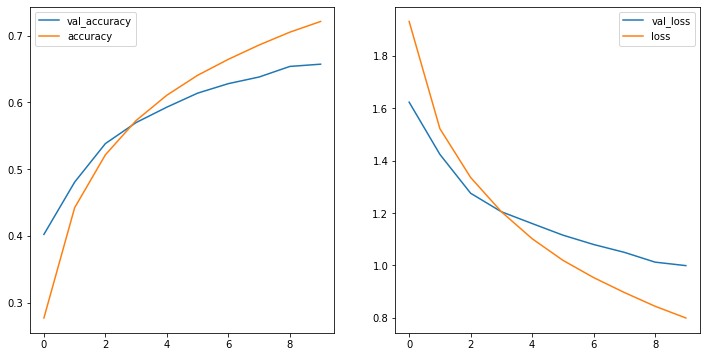

In [ ]:
plot_loss_curves(history_1)

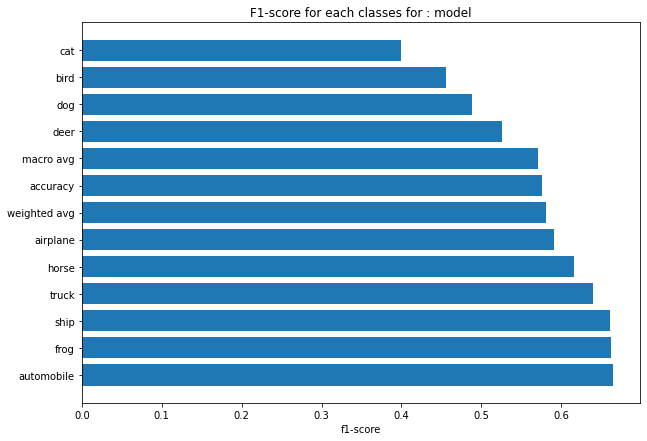

In [ ]:
plot_results(model_1,preds , tf.squeeze(val_labels).numpy())

In [ ]:
predicted_probabilities = np.max(preds_probs , axis = 1)
prediction_df = pd.DataFrame({'images': list(val_images),
                'predicted_probabilities':predicted_probabilities,
                'true_labels': tf.squeeze(val_labels).numpy(),
                'predicted_labels': preds,
                'true_class':[classnames[i] for i in tf.squeeze(val_labels).numpy()],
                'pred_class':[classnames[i] for i in preds]})

In [ ]:
top_100_wrong_predictions = prediction_df[prediction_df.true_labels!=prediction_df.predicted_labels].sort_values(by = 'predicted_probabilities').tail(100).reset_index(drop = True)

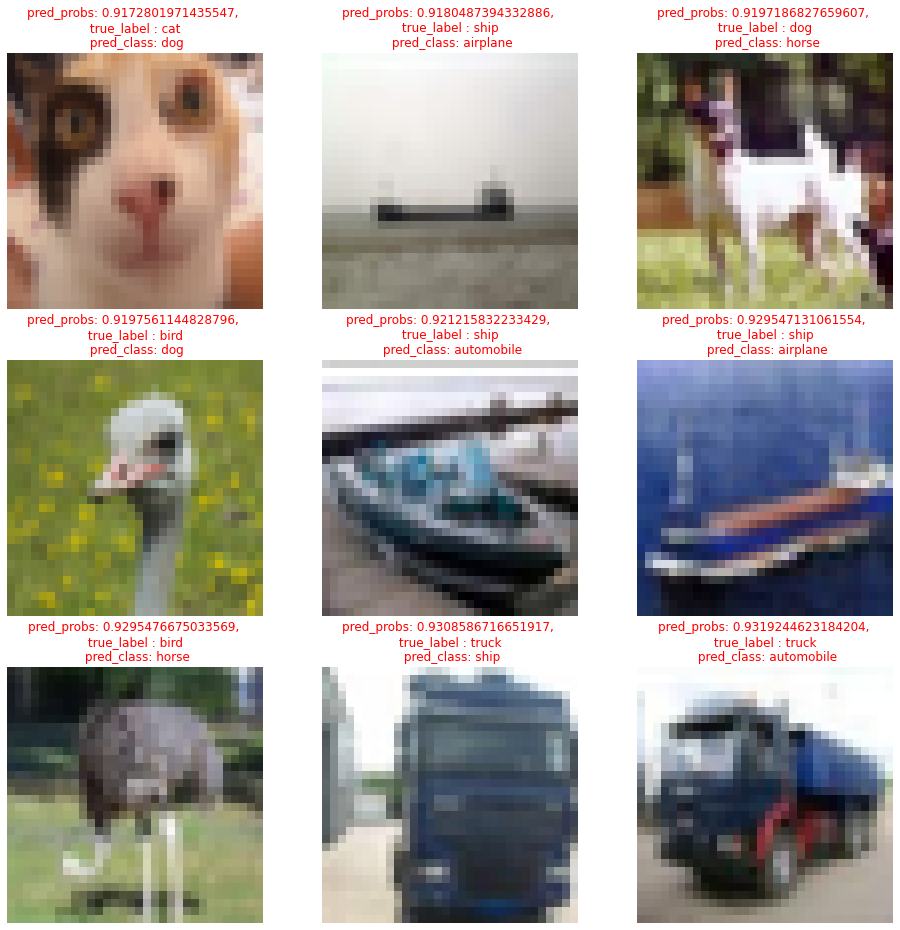

In [ ]:
random_index = random.randint(0,100-9)
plt.figure(figsize = (16,16))
for index,row in enumerate(top_100_wrong_predictions[random_index:random_index+9].itertuples(),1):
  _,images,probs,_,_,true_class,pred_class = row
  plt.subplot(3,3,index)
  imshow(images)
  plt.title(f'pred_probs: {probs}, \n true_label : {true_class} \n pred_class: {pred_class}', color = 'r')
  plt.axis(False)

## Model 2 : Model_0 architecture with image augmentation

In [ ]:
train_augmented_dataset = preprocessing_func(train_images,train_labels,augmentation = True)

In [ ]:
train_dataset = preprocessing_func(train_images,train_labels,augmentation = False)
val_dataset = preprocessing_func(val_images,val_labels,augmentation = False)
test_dataset = preprocessing_func(test_images,test_labels,augmentation = False)

In [ ]:
train_augmented_dataset,val_augmented_dataset

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>)

In [ ]:
augmented_example = train_augmented_dataset.take(1)
regular_example = train_dataset.take(1)

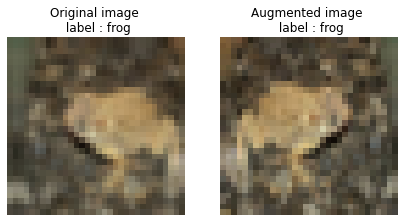

In [ ]:
for (images,labels),(augmented_images,augmented_labels) in zip(augmented_example,regular_example):
  random_index = random.randint(0,len(images)-1)
  plt.figure(figsize=(7,7))
  plt.subplot(1,2,1)
  imshow(images[random_index])
  plt.axis(False)
  plt.title(f'Original image \n label : {classnames[labels[random_index][0]]}')
  plt.subplot(1,2,2)
  imshow(augmented_images[random_index])
  plt.axis(False)
  plt.title(f'Augmented image \n label : {classnames[augmented_labels[random_index][0]]}')

In [ ]:
model_2 = tf.keras.models.clone_model(model_0)

In [ ]:
model_2._name = 'model_0_with_augmented_data'

In [ ]:
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'],
                optimizer = tf.keras.optimizers.Adam())

In [ ]:
model_2_history = model_2.fit(train_augmented_dataset,
                              epochs = 10,
                              validation_data = val_dataset,
                              callbacks = [tf.keras.callbacks.EarlyStopping(min_delta = 0.01,
                                                                            patience = 2,
                                                                            restore_best_weights = True),
                                          tf.keras.callbacks.ModelCheckpoint(filepath = filepath,
                                                                              save_weights_only = True,
                                                                              save_best_only = True)])

Epoch 1/10
1172/1172 [==============================] - 61s 51ms/step - loss: 1.7249 - accuracy: 0.3639 - val_loss: 1.4091 - val_accuracy: 0.4908
Epoch 2/10
1172/1172 [==============================] - 59s 50ms/step - loss: 1.3994 - accuracy: 0.4961 - val_loss: 1.2398 - val_accuracy: 0.5583
Epoch 3/10
1172/1172 [==============================] - 61s 52ms/step - loss: 1.2707 - accuracy: 0.5459 - val_loss: 1.1177 - val_accuracy: 0.5990
Epoch 4/10
1172/1172 [==============================] - 61s 52ms/step - loss: 1.1798 - accuracy: 0.5787 - val_loss: 1.0772 - val_accuracy: 0.6173
Epoch 5/10
1172/1172 [==============================] - 59s 50ms/step - loss: 1.1199 - accuracy: 0.6019 - val_loss: 1.0535 - val_accuracy: 0.6314
Epoch 6/10
1172/1172 [==============================] - 59s 50ms/step - loss: 1.0724 - accuracy: 0.6202 - val_loss: 1.1268 - val_accuracy: 0.6104
Epoch 7/10
1172/1172 [==============================] - 59s 50ms/step - loss: 1.0354 - accuracy: 0.6330 - val_loss: 0.9929 -

In [ ]:
preds_probs = model_2.predict(val_dataset)
preds = np.argmax(preds_probs, axis = 1)

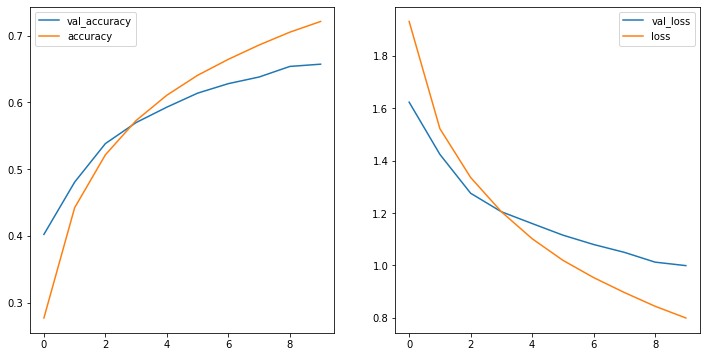

In [ ]:
plot_loss_curves(model_2_history)

In [ ]:
model_2.evaluate(val_dataset)

391/391 [==============================] - 5s 11ms/step - loss: 0.9731 - accuracy: 0.6632


[0.9731166362762451, 0.6632000207901001]

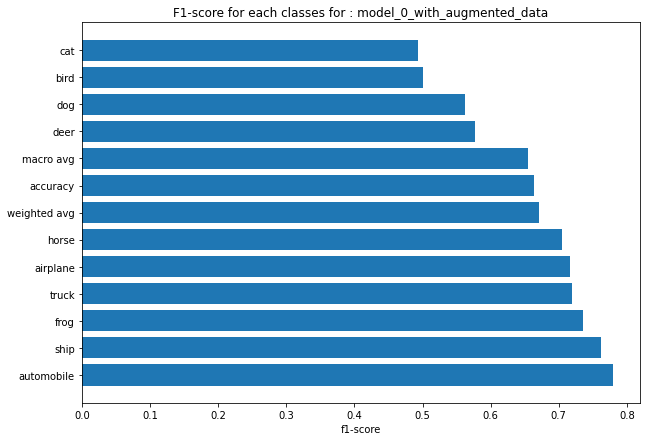

In [ ]:
plot_results(model_2,preds , tf.squeeze(val_labels).numpy())

In [ ]:
predicted_probabilities = np.max(preds_probs , axis = 1)
prediction_df = pd.DataFrame({'images': list(val_images),
                'predicted_probabilities':predicted_probabilities,
                'true_labels': tf.squeeze(val_labels).numpy(),
                'predicted_labels': preds,
                'true_class':[classnames[i] for i in tf.squeeze(val_labels).numpy()],
                'pred_class':[classnames[i] for i in preds]})

In [ ]:
top_100_wrong_predictions = prediction_df[prediction_df.true_labels!=prediction_df.predicted_labels].sort_values(by = 'predicted_probabilities').tail(100).reset_index(drop = True)

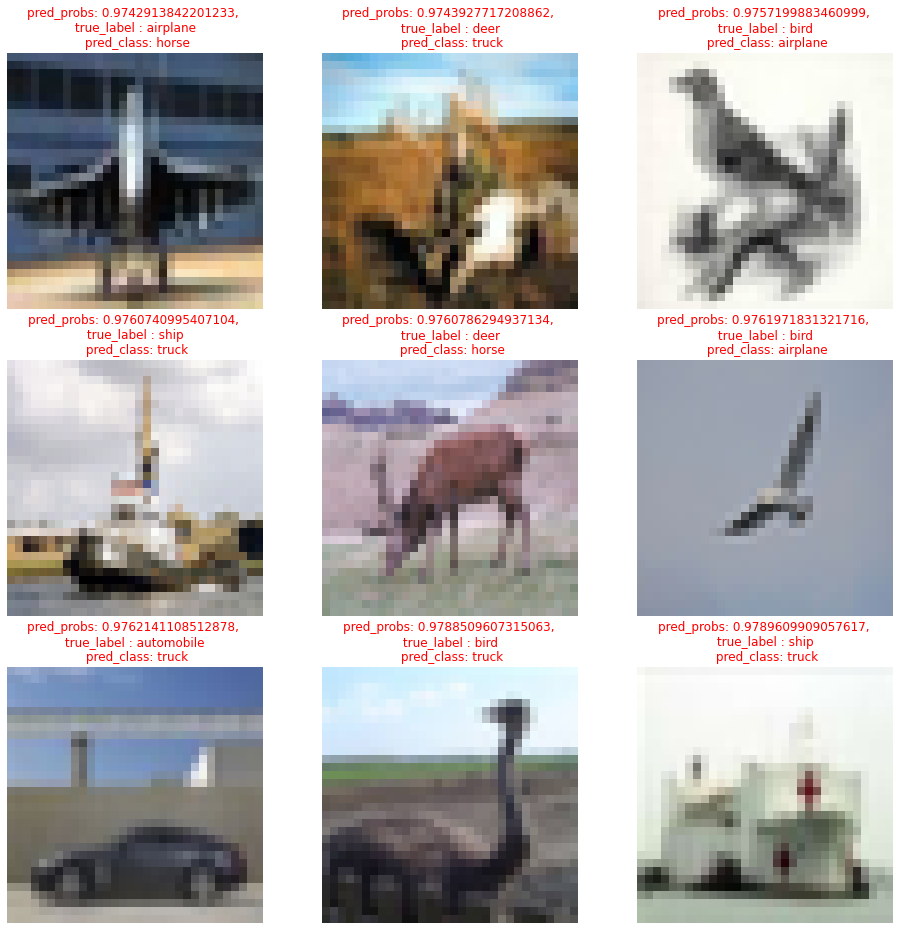

In [ ]:
random_index = random.randint(0,100-9)
plt.figure(figsize = (16,16))
for index,row in enumerate(top_100_wrong_predictions[random_index:random_index+9].itertuples(),1):
  _,images,probs,_,_,true_class,pred_class = row
  plt.subplot(3,3,index)
  imshow(images)
  plt.title(f'pred_probs: {probs}, \n true_label : {true_class} \n pred_class: {pred_class}', color = 'r')
  plt.axis(False)

## Model 3: EfficientNet with augmented data

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_shape = (32,32,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape =input_shape , name = 'input_layer')
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(classnames))(x)
outputs = layers.Activation('softmax', dtype = tf.float32 , name = 'softmax_float32')(x)
model_3 = tf.keras.Model(inputs,outputs , name = 'EfficientNetB0')

model_3._name = 'model_1_with_augmented_data'

In [ ]:
model_3.summary()

Model: "model_1_with_augmented_data"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
 softmax_float32 (Activation  (None, 10)               0         
 )                                                               
                                                                 
Total params: 4,062,381
Trainable param

In [ ]:
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'],
                optimizer = tf.keras.optimizers.Adam())

In [ ]:
train_augmented_dataset = preprocessing_func(train_images,train_labels,scale = False, augmentation = True)
val_dataset = preprocessing_func(val_images,val_labels,scale = False , augmentation = False)

In [ ]:
train_augmented_dataset,val_dataset

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>)

In [ ]:
history_3 = model_3.fit(train_augmented_dataset,
                        epochs = 10,
                        validation_data = val_dataset,
                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2,
                                                                      restore_best_weights = True,
                                                                      min_delta = 0.01),
                                    tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints',
                                                                      save_best_only = True)])

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 1.6492 - accuracy: 0.4202INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 134s 110ms/step - loss: 1.6492 - accuracy: 0.4202 - val_loss: 1.4541 - val_accuracy: 0.4898
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 1.4496 - accuracy: 0.4868INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 124s 106ms/step - loss: 1.4496 - accuracy: 0.4868 - val_loss: 1.3976 - val_accuracy: 0.5059
Epoch 3/10
1171/1172 [============================>.] - ETA: 0s - loss: 1.3902 - accuracy: 0.5100INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 129s 110ms/step - loss: 1.3901 - accuracy: 0.5101 - val_loss: 1.3496 - val_accuracy: 0.5266
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 1.3631 - accuracy: 0.5185INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 128s 109ms/step - loss: 1.3631 - accuracy: 0.5185 - val_loss: 1.3378 - val_accuracy: 0.5274
Epoch 5/10
1171/1172 [============================>.] - ETA: 0s - loss: 1.3352 - accuracy: 0.5297INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 129s 110ms/step - loss: 1.3351 - accuracy: 0.5297 - val_loss: 1.3236 - val_accuracy: 0.5342
Epoch 6/10
1172/1172 [==============================] - ETA: 0s - loss: 1.3256 - accuracy: 0.5301INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 122s 104ms/step - loss: 1.3256 - accuracy: 0.5301 - val_loss: 1.2902 - val_accuracy: 0.5450
Epoch 7/10
1172/1172 [==============================] - ETA: 0s - loss: 1.3090 - accuracy: 0.5362INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 128s 109ms/step - loss: 1.3090 - accuracy: 0.5362 - val_loss: 1.2880 - val_accuracy: 0.5453
Epoch 8/10
1172/1172 [==============================] - ETA: 0s - loss: 1.2992 - accuracy: 0.5421INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 131s 111ms/step - loss: 1.2992 - accuracy: 0.5421 - val_loss: 1.2690 - val_accuracy: 0.5537
Epoch 9/10
1172/1172 [==============================] - ETA: 0s - loss: 1.2933 - accuracy: 0.5434INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 159s 135ms/step - loss: 1.2933 - accuracy: 0.5434 - val_loss: 1.2658 - val_accuracy: 0.5538
Epoch 10/10
1171/1172 [============================>.] - ETA: 0s - loss: 1.2797 - accuracy: 0.5476INFO:tensorflow:Assets written to: model_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


1172/1172 [==============================] - 154s 131ms/step - loss: 1.2795 - accuracy: 0.5477 - val_loss: 1.2644 - val_accuracy: 0.5534


In [ ]:
preds_probs = model_3.predict(val_dataset)
preds = np.argmax(preds_probs, axis = 1)

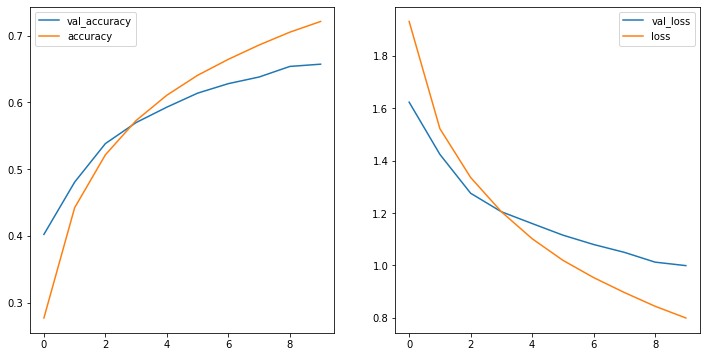

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.evaluate(val_dataset)

391/391 [==============================] - 38s 97ms/step - loss: 1.2690 - accuracy: 0.5537


[1.2689862251281738, 0.5536800026893616]

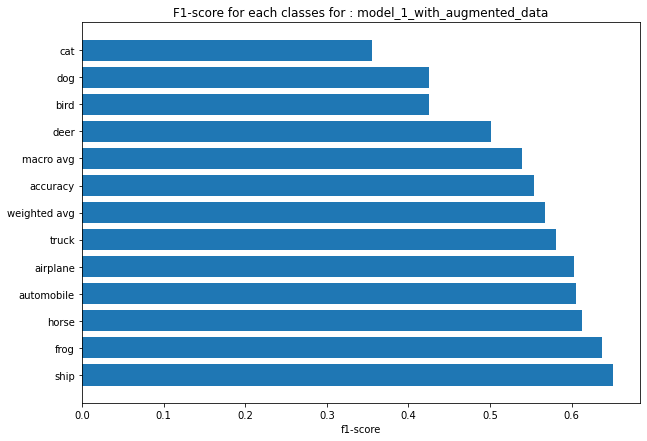

In [ ]:
plot_results(model_3,preds , tf.squeeze(val_labels).numpy())

In [ ]:
predicted_probabilities = np.max(preds_probs , axis = 1)
prediction_df = pd.DataFrame({'images': list(val_images),
                'predicted_probabilities':predicted_probabilities,
                'true_labels': tf.squeeze(val_labels).numpy(),
                'predicted_labels': preds,
                'true_class':[classnames[i] for i in tf.squeeze(val_labels).numpy()],
                'pred_class':[classnames[i] for i in preds]})

In [ ]:
top_100_wrong_predictions = prediction_df[prediction_df.true_labels!=prediction_df.predicted_labels].sort_values(by = 'predicted_probabilities').tail(100).reset_index(drop = True)

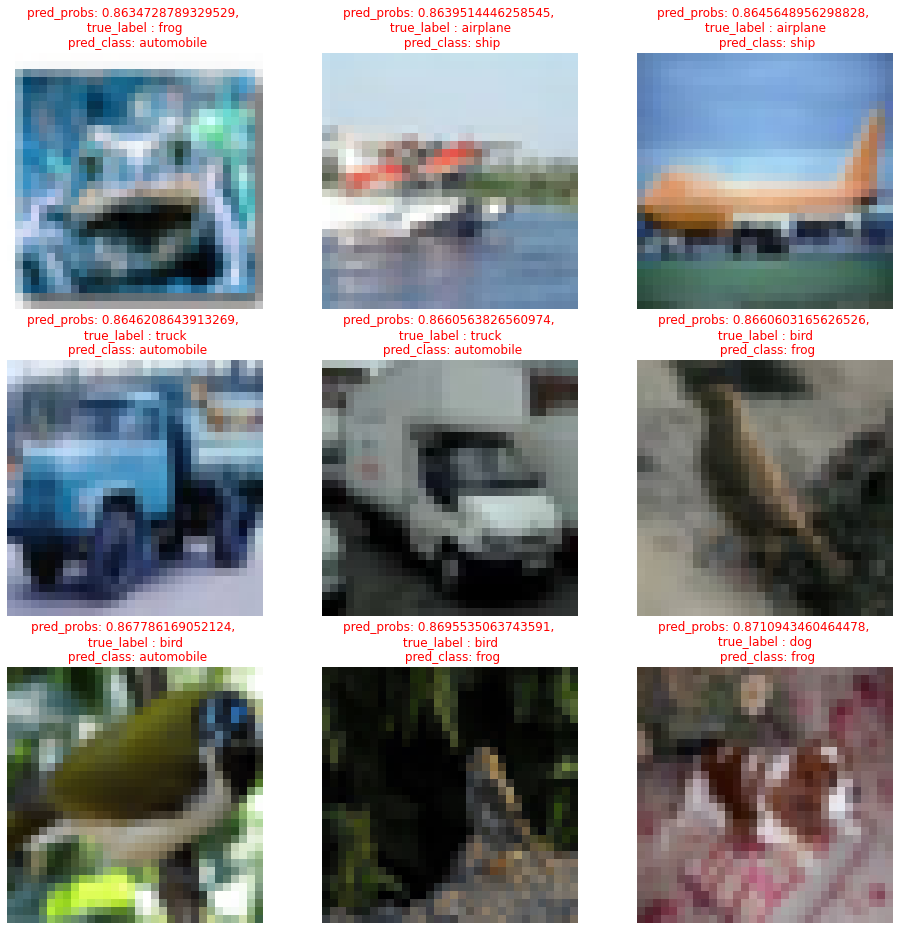

In [ ]:
random_index = random.randint(0,100-9)
plt.figure(figsize = (16,16))
for index,row in enumerate(top_100_wrong_predictions[random_index:random_index+9].itertuples(),1):
  _,images,probs,_,_,true_class,pred_class = row
  plt.subplot(3,3,index)
  imshow(images)
  plt.title(f'pred_probs: {probs}, \n true_label : {true_class} \n pred_class: {pred_class}', color = 'r')
  plt.axis(False)

## Model 4: VGG Block with augmented data

In [18]:
input = layers.Input(shape = (32,32,3), name = 'input_layer')
x =  layers.Conv2D(32, (2,2), activation='relu')(input)
x = layers.Conv2D(32 , (2,2) , activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2))(x)
x = layers.Conv2D(64 , (2,2) , activation = 'relu')(x)
x = layers.Conv2D(64 , (2,2) , activation = 'relu')(x)
x = layers.MaxPool2D(pool_size = (2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64,activation = 'relu')(x)
x = layers.Dense(64,activation = 'relu')(x)
x = layers.Dense(64,activation = 'relu')(x)
output = layers.Dense(len(classnames), activation = 'softmax')(x)

model_4 = tf.keras.Model(inputs = input , outputs = output)


In [19]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                             

In [20]:
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'],
                optimizer = tf.keras.optimizers.Adam())

In [23]:
train_augmented_dataset = preprocessing_func(train_images,train_labels,scale = True, augmentation = True)

val_dataset = preprocessing_func(val_images,val_labels,scale = True , augmentation = False)

In [24]:
train_augmented_dataset,val_dataset

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>)

In [25]:
filepath = 'model_checkpoint'
history_4 = model_4.fit(train_augmented_dataset,
                        epochs = 10,
                        validation_data = val_dataset,
                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2,
                                                                      restore_best_weights = True,
                                                                      min_delta = 0.01),
                                    tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints',
                                                                      save_best_only = True)])

Epoch 1/10
1172/1172 [==============================] - 156s 132ms/step - loss: 1.7799 - accuracy: 0.3351 - val_loss: 1.4430 - val_accuracy: 0.4774
Epoch 2/10
1172/1172 [==============================] - 162s 139ms/step - loss: 1.4500 - accuracy: 0.4673 - val_loss: 1.3117 - val_accuracy: 0.5270
Epoch 3/10
1172/1172 [==============================] - 162s 138ms/step - loss: 1.3013 - accuracy: 0.5291 - val_loss: 1.1653 - val_accuracy: 0.5874
Epoch 4/10
1172/1172 [==============================] - 164s 140ms/step - loss: 1.1954 - accuracy: 0.5711 - val_loss: 1.1143 - val_accuracy: 0.6052
Epoch 5/10
1172/1172 [==============================] - 224s 191ms/step - loss: 1.1256 - accuracy: 0.5969 - val_loss: 1.0686 - val_accuracy: 0.6236
Epoch 6/10
1172/1172 [==============================] - 227s 193ms/step - loss: 1.0633 - accuracy: 0.6236 - val_loss: 1.0571 - val_accuracy: 0.6278
Epoch 7/10
1172/1172 [==============================] - 224s 191ms/step - loss: 1.0140 - accuracy: 0.6397 - val_

In [26]:
model_4.evaluate(val_dataset)

391/391 [==============================] - 19s 47ms/step - loss: 0.9129 - accuracy: 0.6787


[0.9128782749176025, 0.6787199974060059]

In [27]:
preds_probs = model_4.predict(val_dataset)
preds = np.argmax(preds_probs, axis = 1)

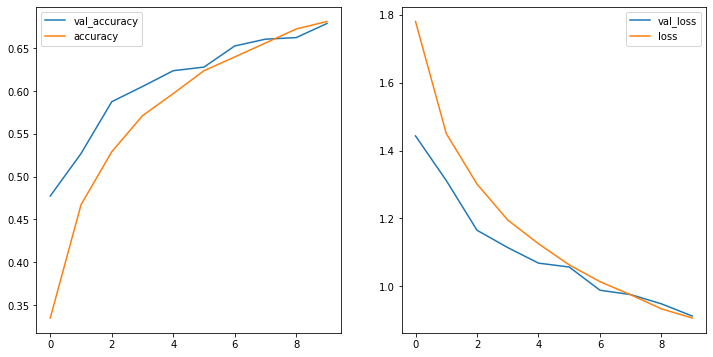

In [30]:
plot_loss_curves(history_4)

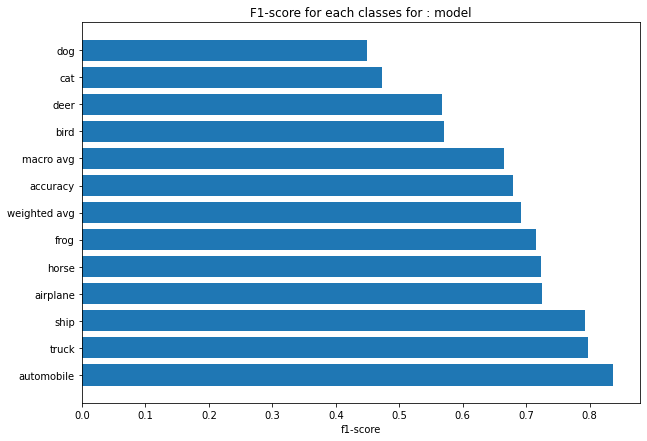

In [31]:
plot_results(model_4,preds , tf.squeeze(val_labels).numpy())

In [32]:
predicted_probabilities = np.max(preds_probs , axis = 1)
prediction_df = pd.DataFrame({'images': list(val_images),
                'predicted_probabilities':predicted_probabilities,
                'true_labels': tf.squeeze(val_labels).numpy(),
                'predicted_labels': preds,
                'true_class':[classnames[i] for i in tf.squeeze(val_labels).numpy()],
                'pred_class':[classnames[i] for i in preds]})

In [33]:
top_100_wrong_predictions = prediction_df[prediction_df.true_labels!=prediction_df.predicted_labels].sort_values(by = 'predicted_probabilities').tail(100).reset_index(drop = True)

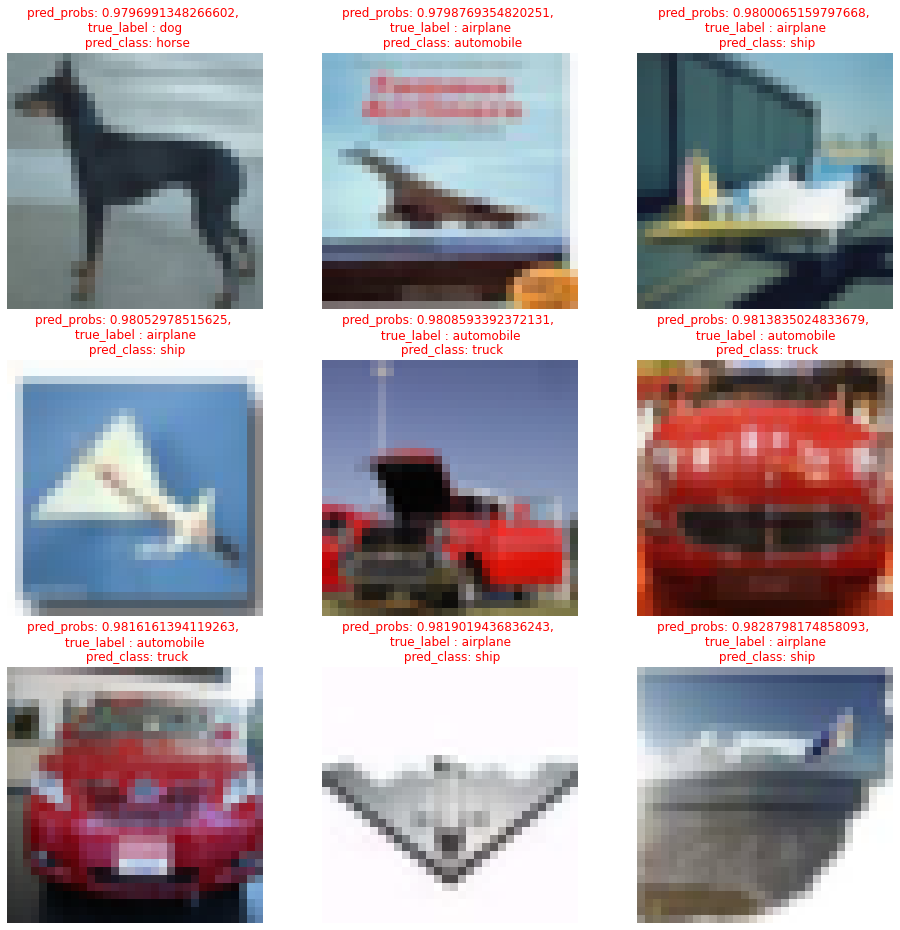

In [35]:
random_index = random.randint(0,100-9)
plt.figure(figsize = (16,16))
for index,row in enumerate(top_100_wrong_predictions[random_index:random_index+9].itertuples(),1):
  _,images,probs,_,_,true_class,pred_class = row
  plt.subplot(3,3,index)
  imshow(images)
  plt.title(f'pred_probs: {probs}, \n true_label : {true_class} \n pred_class: {pred_class}', color = 'r')
  plt.axis(False)

## Model 5 : VGG Block with 2,2 kernel size and addition Conv2D layers

In [44]:
input = layers.Input(shape = (32,32,3), name = 'input_layer')
x =  layers.Conv2D(32, (2,2), activation='relu',kernel_initializer='he_normal')(input)
x = layers.Conv2D(32 , (2,2) , activation = 'relu',kernel_initializer='he_normal')(x)
x = layers.MaxPooling2D(pool_size = (2,2))(x)
x = layers.Conv2D(64 , (2,2) , activation = 'relu',kernel_initializer='he_normal')(x)
x = layers.Conv2D(64 , (2,2) , activation = 'relu',kernel_initializer='he_normal')(x)
x = layers.MaxPool2D(pool_size = (2,2))(x)
x = layers.Conv2D(64 , (2,2) , activation = 'relu',kernel_initializer='he_normal')(x)
x = layers.Conv2D(64 , (2,2) , activation = 'relu',kernel_initializer='he_normal')(x)
x = layers.MaxPool2D(pool_size = (2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64,activation = 'relu')(x)
x = layers.Dense(64,activation = 'relu')(x)
x = layers.Dense(64,activation = 'relu')(x)
output = layers.Dense(len(classnames), activation = 'softmax')(x)

model_5 = tf.keras.Model(inputs = input , outputs = output)

In [45]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 31, 31, 32)        416       
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        4128      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        16448     
                                                           

In [47]:
model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'],
                optimizer = tf.keras.optimizers.Adam())

In [48]:
filepath = 'model_checkpoint'
history_5 = model_5.fit(train_augmented_dataset,
                        epochs = 10,
                        validation_data = val_dataset,
                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2,
                                                                      restore_best_weights = True,
                                                                      min_delta = 0.01),
                                    tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints',
                                                                      save_best_only = True)])

Epoch 1/10
1172/1172 [==============================] - 173s 147ms/step - loss: 1.7197 - accuracy: 0.3579 - val_loss: 1.5285 - val_accuracy: 0.4308
Epoch 2/10
1172/1172 [==============================] - 147s 125ms/step - loss: 1.4169 - accuracy: 0.4806 - val_loss: 1.3562 - val_accuracy: 0.4942
Epoch 3/10
1172/1172 [==============================] - 142s 121ms/step - loss: 1.2750 - accuracy: 0.5386 - val_loss: 1.2040 - val_accuracy: 0.5661
Epoch 4/10
1172/1172 [==============================] - 154s 131ms/step - loss: 1.1938 - accuracy: 0.5707 - val_loss: 1.1964 - val_accuracy: 0.5729
Epoch 5/10
1172/1172 [==============================] - 152s 129ms/step - loss: 1.1220 - accuracy: 0.5995 - val_loss: 1.1306 - val_accuracy: 0.5975
Epoch 6/10
1172/1172 [==============================] - 159s 136ms/step - loss: 1.0698 - accuracy: 0.6180 - val_loss: 1.0676 - val_accuracy: 0.6240
Epoch 7/10
1172/1172 [==============================] - 208s 177ms/step - loss: 1.0189 - accuracy: 0.6376 - val_

In [49]:
preds_probs = model_5.predict(val_dataset)
preds = np.argmax(preds_probs, axis = 1)

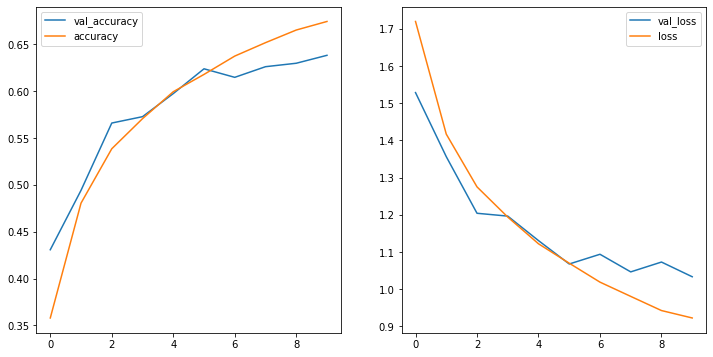

In [50]:
plot_loss_curves(history_5)

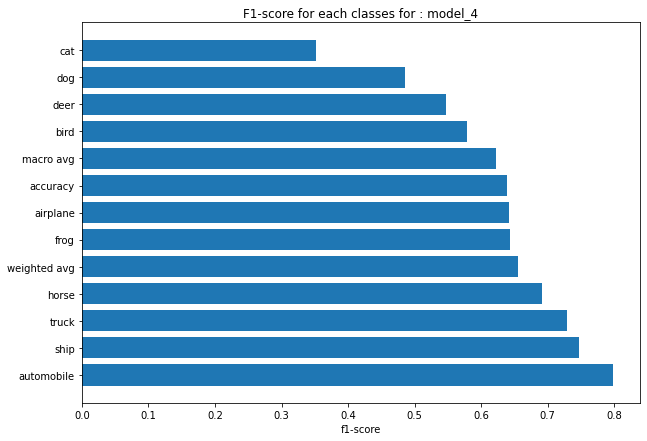

In [51]:
plot_results(model_5,preds , tf.squeeze(val_labels).numpy())

In [52]:
predicted_probabilities = np.max(preds_probs , axis = 1)
prediction_df = pd.DataFrame({'images': list(val_images),
                'predicted_probabilities':predicted_probabilities,
                'true_labels': tf.squeeze(val_labels).numpy(),
                'predicted_labels': preds,
                'true_class':[classnames[i] for i in tf.squeeze(val_labels).numpy()],
                'pred_class':[classnames[i] for i in preds]})

In [53]:
top_100_wrong_predictions = prediction_df[prediction_df.true_labels!=prediction_df.predicted_labels].sort_values(by = 'predicted_probabilities').tail(100).reset_index(drop = True)

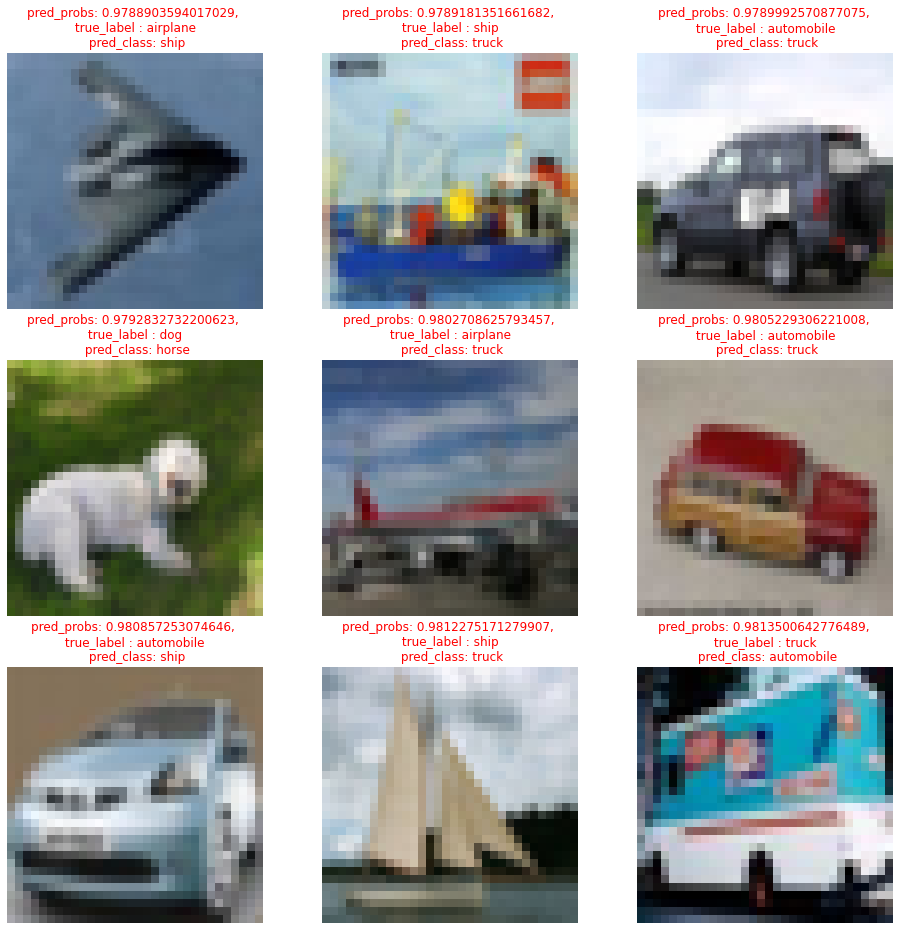

In [61]:
random_index = random.randint(0,100-9)
plt.figure(figsize = (16,16))
for index,row in enumerate(top_100_wrong_predictions[random_index:random_index+9].itertuples(),1):
  _,images,probs,_,_,true_class,pred_class = row
  plt.subplot(3,3,index)
  imshow(images)
  plt.title(f'pred_probs: {probs}, \n true_label : {true_class} \n pred_class: {pred_class}', color = 'r')
  plt.axis(False)

In [62]:
from sklearn.metrics import multilabel_confusion_matrix

In [72]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

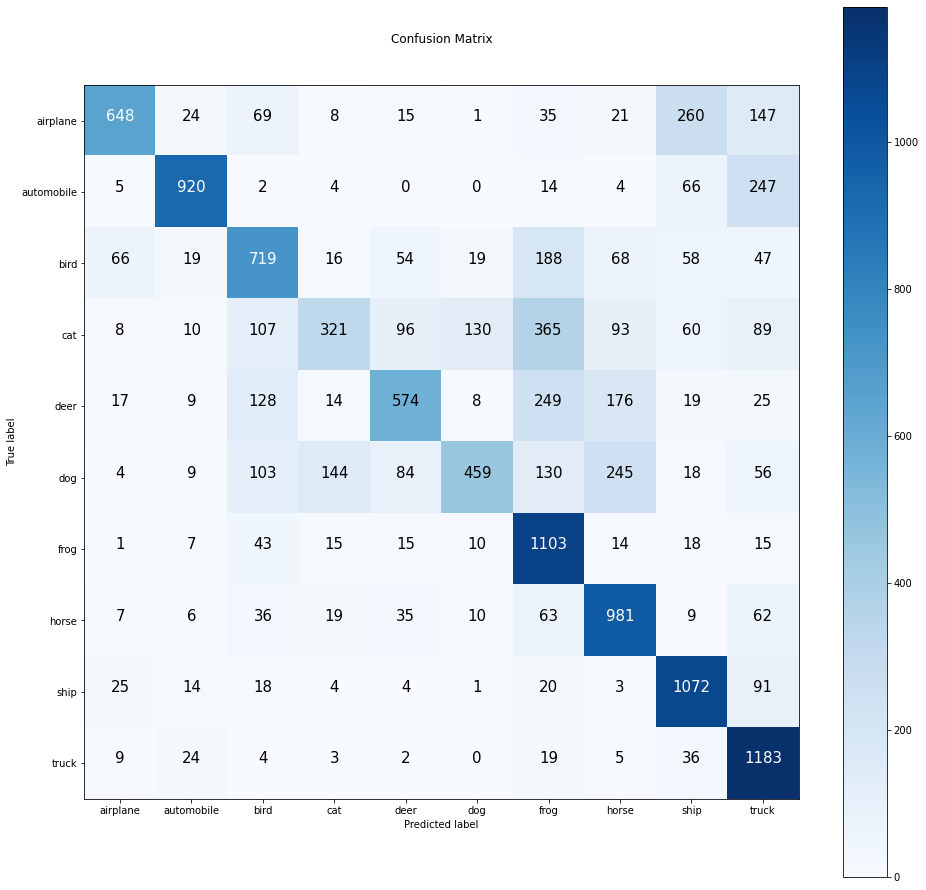

In [73]:
make_confusion_matrix(y_true = val_labels, y_pred = preds, classes= classnames, figsize=(16, 16), text_size=15, norm=False, savefig=False)

1. The model seems to be struggling with differentiating between 4 legged animals
2. Model 4 has the most potential and may benefit from increased complexity and may also benefit from running more epochs.